In [1]:
!wget https://openneuro.org/crn/datasets/ds003950/snapshots/1.0.0/files/sub-01:anat:sub-01_T1w.nii -O $TMP/T1w.nii

--2022-07-05 20:08:13--  https://openneuro.org/crn/datasets/ds003950/snapshots/1.0.0/files/sub-01:anat:sub-01_T1w.nii
Resolving openneuro.org (openneuro.org)... 13.35.73.62, 13.35.73.17, 13.35.73.21, ...
Connecting to openneuro.org (openneuro.org)|13.35.73.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘sub-01:anat:sub-01_T1w.nii’

    [                     <=>               ] 36,700,512  8.99MB/s   in 4.2s   

2022-07-05 20:08:17 (8.40 MB/s) - ‘sub-01:anat:sub-01_T1w.nii’ saved [36700512]



In [1]:
import torch
import matplotlib.pyplot as plt
from cornucopia import ContrastMixtureTransform, LoadTransform
import os

In [3]:
import nibabel as nib
dat = torch.as_tensor(nib.load('sub-01:anat:sub-01_T1w.nii').get_fdata())

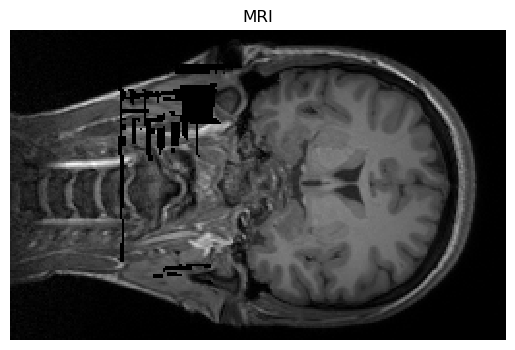

In [3]:
fname = os.path.join(os.environ['TMP'], 'T1w.nii')
dat = LoadTransform()('sub-01:anat:sub-01_T1w.nii')

plt.imshow(dat[0, :, dat.shape[2]//2], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.show()

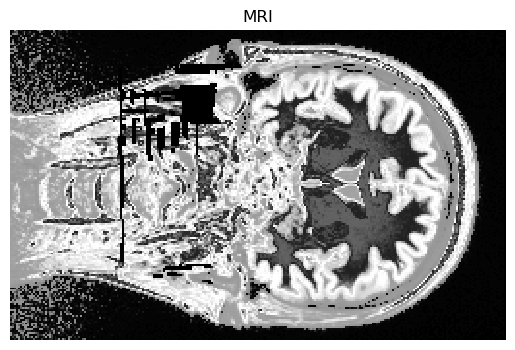

In [8]:
trf = ContrastMixtureTransform()
aug = trf(dat)

plt.imshow(aug[0, :, aug.shape[2]//2], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.show()